# Geopandas


In [1]:
import pandas as pd
import geopandas

In [2]:
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")

GeoDataFrame es esencialmente un DataFrame de Pandas

In [3]:
type(countries)

geopandas.geodataframe.GeoDataFrame

La mas gran diferencia la veremos en su columna 'geometry'

In [4]:
countries.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

Y en su caracteristica manera de plotearse

<Axes: >

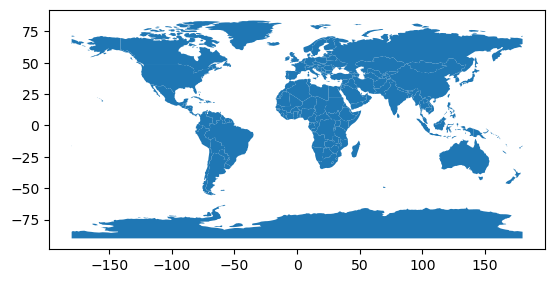

In [5]:
countries.plot()

Extraemos la columna geometry del GeoDataFrame countries

In [6]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

GeoSeries es parecido a una Serie de Pandas, pero cada elemento es una geometría (punto, línea, polígono, etc.) en lugar de datos escalar.

In [7]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

calculamos el área


In [8]:
countries.geometry.area

/tmp/ipykernel_29309/3077649407.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.area


0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

También podemos hacer cálculos como los que haríamos en cualquier DataFrame, por ejemploÑ calcular el promedio de la población estimada

In [15]:
countries['pop_est'].mean()

41712369.84180791

## Crear un geopandas desde cero


In [9]:
from shapely.geometry import Point
ejemplo= geopandas.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2)],
    'attribute1': [1, 2],
    'attribute2': [0.1, 0.2]})

In [10]:
type(ejemplo)

geopandas.geodataframe.GeoDataFrame

<Axes: >

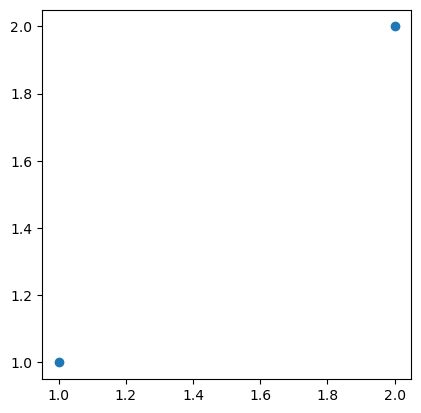

In [11]:
ejemplo.plot()

## Crear un geopandas desde un dataframe ya establecido

In [12]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

geopandas.points_from_xy es una función de GeoPandas que toma las coordenadas x (en este caso, 'Longitude') y las coordenadas y (en este caso, 'Latitude') del DataFrame y crea geometrías de punto a partir de ellas.

In [13]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [14]:
gdf

City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)

## Podemos seccionar el gdf para que solo nos muestre una parte de todo

In [16]:
africa = countries[countries['continent'] == 'Africa']

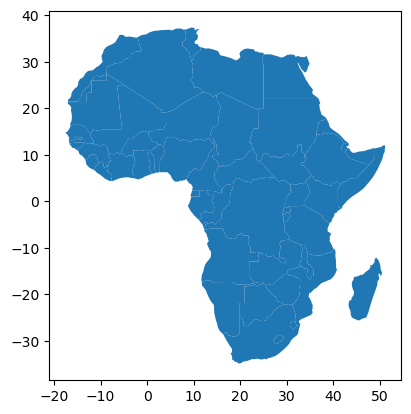

In [17]:
africa.plot();

EPSG (Sistema de Identificación de Parámetros Geodésicos Europeos). El código EPSG es un sistema de referencia de coordenadas. La advertencia que sale del código de arriba se debe a que GeoDataFrame está utilizando un sistema de coordenadas geográficas en donde los resultados pueden no ser precisos debido a la naturaleza esférica de la Tierra. Para obtener resultados más precisos al calcular áreas, se requiere proyectar las geometrías a un sistema de coordenadas proyectadas.

El sistema de referencia de coordenadas (CRS, por sus siglas en inglés) se utiliza para definir la traducción entre una ubicación en la Tierra redonda y esa misma ubicación en un sistema de coordenadas plano bidimensional.

In [132]:
# Especifica el sistema de coordenadas proyectadas deseado (por ejemplo, EPSG:3395 para proyección Mercator)
target_crs = 'EPSG:3395'

# Proyectar las geometrías al sistema de coordenadas proyectadas
africa = africa.to_crs(target_crs)



Tambien podemos calcular el area de las zonas que estamos graficando

In [133]:
# Calcular el área y el perímetro
africa['area'] = africa.geometry.area
africa['perimeter'] = africa.geometry.length

# Mostrar el GeoDataFrame resultante
print(africa.head(5))

             iso_a3 continent     pop_est  gdp_md_est  \
name                                                    
Angola          AGO    Africa  29310273.0    189000.0   
Burundi         BDI    Africa  11466756.0      7892.0   
Benin           BEN    Africa  11038805.0     24310.0   
Burkina Faso    BFA    Africa  20107509.0     32990.0   
Botswana        BWA    Africa   2214858.0     35900.0   

                                                       geometry          area  \
name                                                                            
Angola        MULTIPOLYGON (((2660998.216 -1305442.810, 2680...  1.307538e+12   
Burundi       POLYGON ((3266113.592 -498101.603, 3259032.149...  2.633163e+10   
Benin         POLYGON ((299638.862 693463.123, 207637.624 68...  1.204479e+11   
Burkina Faso  POLYGON ((239834.893 1330063.296, 215512.925 1...  2.845742e+11   
Botswana      POLYGON ((3276376.220 -2506428.984, 3118864.44...  6.899565e+11   

                 perimeter  grou

In [20]:
africa = africa.assign(group=1)
africa_boundary = africa.dissolve(by = 'group')
africa.head()

GEOSException: TopologyException: side location conflict at 2659089.2863236051 956785.45608646388. This can occur if the input geometry is invalid.

TopologyException: side location conflict, indica que hay un problema topológico con una o más geometrías en tu GeoDataFrame. Esto suele ocurrir cuando las geometrías tienen intersecciones

In [21]:
africa['geometry'] = africa['geometry'].buffer(0)
africa = africa.assign(group=1)
africa_boundary = africa.dissolve(by='group')

el buffer() crea una solución limpia

<Axes: >

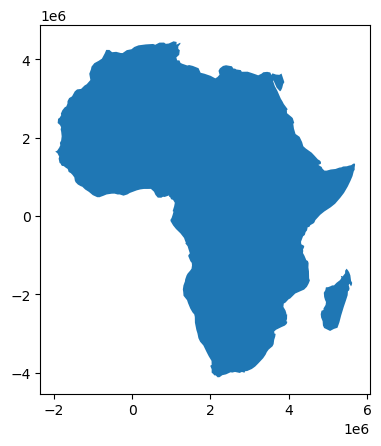

In [22]:
africa_boundary.plot()

In [24]:
lfb = pd.read_csv('data/lfb_2009_2020.csv')
lfb.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing  
0         Norbury   532350    170050  
1        Woodside   534750    167550  
2      Wallington   528050    164950  
3         Ruislip   504650    190650  
4     Harold Hill   554650    192350

<Axes: >

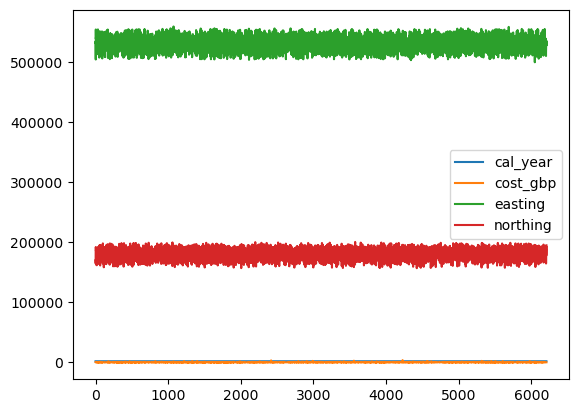

In [25]:
lfb.plot()

In [26]:
lfb_gdf  = geopandas.GeoDataFrame(lfb,geometry=geopandas.points_from_xy(lfb.easting,lfb.northing), crs = 'EPSG:27700')

In [27]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing                       geometry  
0         Norbury   532350    170050  POINT (532350.000 170050.000)  
1        Woodside   534750    167550  POINT (534750.000 167550.000)  
2      Wallington   528050    164950  POINT (528050.000 164950.000)  
3         Ruislip   504650    190650  POINT (504650.000 190650.000)  
4     Harold Hill   554650    192350  POINT (554650.000 192350.000)

<Axes: >

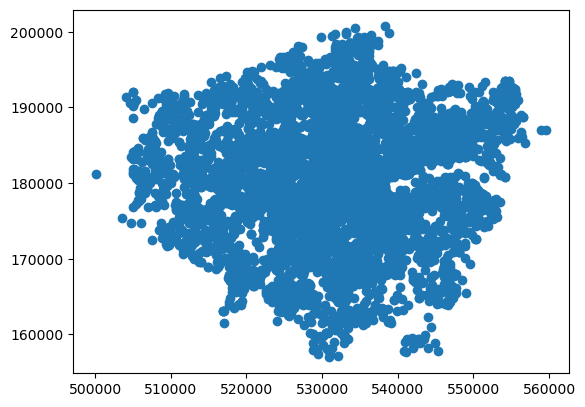

In [28]:
lfb_gdf.plot()

In [30]:
utla_2019 = geopandas.read_file('data/London_and_surrounding_UTLAs.shp')

geopandas.overlay realiza una superposición espacial de dos GeoDataFrames y genera un nuevo GeoDataFrame.

<Axes: >

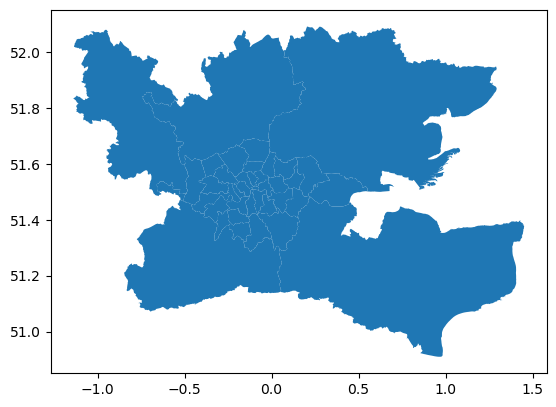

In [31]:
utla_2019.plot()

In [32]:
lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')

/tmp/ipykernel_29309/3508249551.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: EPSG:4326

  lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')


In [33]:
utla_2019.crs == lfb_gdf.crs

False

In [34]:
utla_2019 = utla_2019.to_crs(epsg=27700)

In [35]:
utla_2019.crs == lfb_gdf.crs

True

In [36]:
lfb_london = geopandas.overlay(lfb_gdf, utla_2019, how='intersection')

In [37]:
lfb_gdf.head()

incident_number  cal_year type_of_incident  cost_gbp  \
0              D1      2009  Special Service     510.0   
1              F2      2009  Special Service     255.0   
2              D3      2009  Special Service     255.0   
3              H4      2009  Special Service     255.0   
4              R5      2009  Special Service     255.0   

                           final_description animal_group_parent  \
0  DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15                 Dog   
1          ASSIST RSPCA WITH FOX TRAPPED,B15                 Fox   
2                    DOG CAUGHT IN DRAIN,B15                 Dog   
3                  HORSE TRAPPED IN LAKE,J17               Horse   
4              RABBIT TRAPPED UNDER SOFA,B15              Rabbit   

   property_category  ward_code                            ward  \
0           Dwelling  E05011467  Crystal Palace & Upper Norwood   
1  Outdoor Structure  E05000169                        Woodside   
2  Outdoor Structure  E05000558              Carshalton Central   
3    Non Residential  E05000330                       Harefield   
4           Dwelling  E05000310                        Gooshays   

  stn_ground_name  easting  northing                       geometry  
0         Norbury   532350    170050  POINT (532350.000 170050.000)  
1        Woodside   534750    167550  POINT (534750.000 167550.000)  
2      Wallington   528050    164950  POINT (528050.000 164950.000)  
3         Ruislip   504650    190650  POINT (504650.000 190650.000)  
4     Harold Hill   554650    192350  POINT (554650.000 192350.000)

<Axes: >

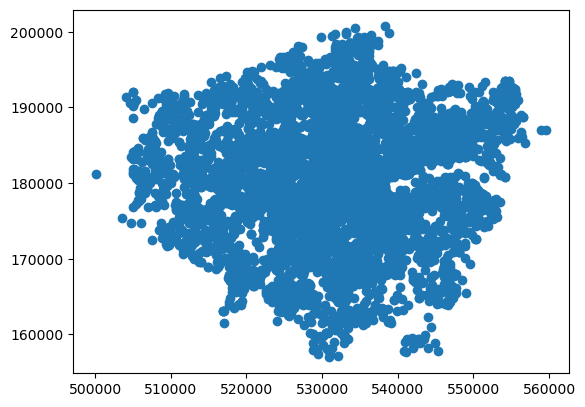

In [38]:
lfb_gdf.plot()

In [39]:
msoa_london = geopandas.read_file('data/MSOA_2011_BSC_London.shp')


<Axes: >

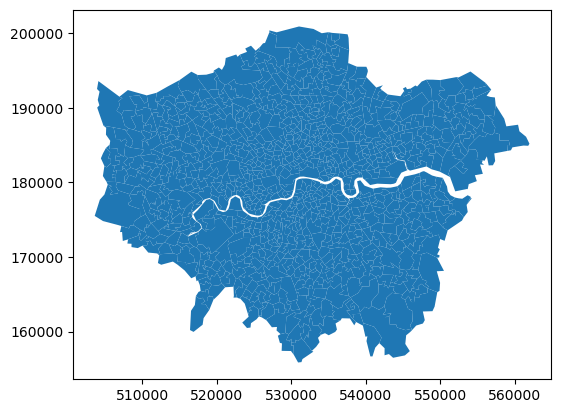

In [40]:
msoa_london.plot()

In [41]:
msoa_london.head()

MSOA11CD                                           geometry
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...
1  E02000002  POLYGON ((549000.726 190873.464, 549120.966 18...
2  E02000003  POLYGON ((548954.517 189063.241, 549085.611 18...
3  E02000004  POLYGON ((551943.782 186027.614, 551670.827 18...
4  E02000005  POLYGON ((549418.680 187442.412, 548983.438 18...

In [42]:
msoa_london.crs == lfb_gdf.crs

True

how='inner': se realizará una unión interna, lo que significa que solo se incluirán las filas que tengan una correspondencia en ambos GeoDataFrames.
predicate='intersects': Especifica el tipo de relación espacial, para intersects esto significa que se incluirán las filas donde las geometrías de msoa_london y lfb_gdf se intersecten en algún punto.
Se creará un nuevo GeoDataFrame llamado london_msoa_lfb que contendrá las geometrías y los datos de ambas entradas originales, pero solo para las áreas que tienen una intersección espacial.

In [43]:
london_msoa_lfb = geopandas.sjoin(msoa_london, lfb_gdf, how = 'inner', predicate = 'intersects')

In [44]:
london_msoa_lfb.head()

MSOA11CD                                           geometry  index_right  \
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         4205   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         6066   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         5334   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         1698   
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...         2322   

  incident_number  cal_year type_of_incident  cost_gbp  \
0           B4429      2016  Special Service     326.0   
0           B6358      2019  Special Service     339.0   
0           B5589      2018  Special Service     333.0   
0           B1784      2011  Special Service     520.0   
0           B2438      2013  Special Service     260.0   

                       final_description animal_group_parent  \
0        ASSIST RSPCA WITH TRAPPED BIRDS                Bird   
0  BIRD TRAPPED UNDER LEDGE ON 7TH FLOOR                Bird   
0            SEAGULL TRAPPED BEHIND DOOR                Bird   
0                   BIRD TRAPPED IN WIRE                Bird   
0    ASSIST RSCPA WITH PIGEON TRAPPED OS                Bird   

  property_category  ward_code          ward stn_ground_name  easting  \
0   Non Residential  E05009303       DOWGATE         Dowgate   532650   
0   Non Residential  E05009291  BILLINGSGATE         Dowgate   533150   
0   Non Residential  E05009296    CANDLEWICK         Dowgate   532850   
0           Outdoor  E05009303       Dowgate         Dowgate   532550   
0   Non Residential  E05009306     Langbourn         Dowgate   532950   

   northing  
0    180850  
0    180850  
0    180850  
0    180850  
0    180950

<Axes: >

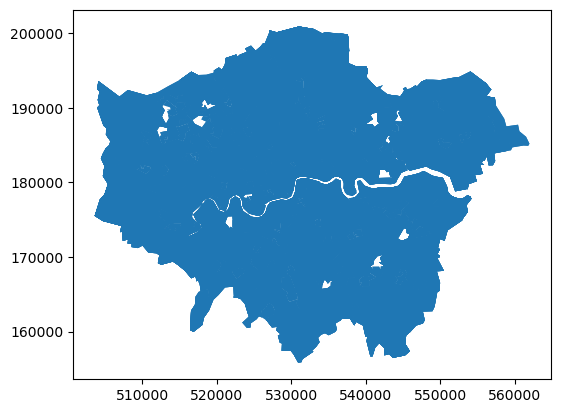

In [45]:
london_msoa_lfb.plot()

Se puede ver que hay algunas áreas faltantes. Vamos a checar esto

In [46]:
lfb_msoa_symmetric_difference = geopandas.overlay(lfb_gdf, london_msoa_lfb, how='symmetric_difference',keep_geom_type=True)

usamos symmetric_difference para encontar los puntos que no intersectaron. y keep_geom_type=True para conservar el tipo de geometría original en el resultado

In [47]:
lfb_msoa_symmetric_difference

incident_number_1  cal_year_1 type_of_incident_1  cost_gbp_1  \
0                D33      2009.0    Special Service       255.0   
1                D54      2009.0    Special Service       255.0   
2                D60      2009.0    Special Service       765.0   
3                C71      2009.0    Special Service      1275.0   
4               D218      2009.0    Special Service       260.0   
5              D1087      2010.0    Special Service       260.0   
6              B1122      2010.0    Special Service       260.0   
7              D1269      2011.0    Special Service         NaN   
8              D1925      2012.0    Special Service       260.0   
9              D2074      2012.0    Special Service       260.0   
10             D2178      2012.0    Special Service       260.0   
11             C2216      2012.0    Special Service       260.0   
12             C2276      2012.0    Special Service         NaN   
13             H2305      2012.0    Special Service       260.0   
14             D2391      2012.0    Special Service       260.0   
15             H2641      2013.0    Special Service       290.0   
16             B2928      2013.0    Special Service       290.0   
17             B3062      2014.0    Special Service       290.0   
18             H3154      2014.0    Special Service       295.0   
19             F3267      2014.0    Special Service       295.0   
20             D3591      2015.0    Special Service       295.0   
21             C3617      2015.0    Special Service       295.0   
22             B3688      2015.0    Special Service       298.0   
23             H3777      2015.0    Special Service       894.0   
24             D3818      2015.0    Special Service       298.0   
25             D3919      2015.0    Special Service         NaN   
26             C4138      2016.0    Special Service       596.0   
27             D4165      2016.0    Special Service       298.0   
28             D4246      2016.0    Special Service       652.0   
29             B4327      2016.0    Special Service       978.0   
30             H4568      2016.0    Special Service       326.0   
31             D4666      2016.0    Special Service       326.0   
32             D4717      2017.0    Special Service       652.0   
33             C4779      2017.0    Special Service       326.0   
34             D4805      2017.0    Special Service       326.0   
35             D4848      2017.0    Special Service       328.0   
36             B5025      2017.0    Special Service       328.0   
37             D5151      2017.0    Special Service         NaN   
38             D5248      2017.0    Special Service       328.0   
39             C5365      2018.0    Special Service       333.0   
40             D5375      2018.0    Special Service         NaN   
41             C5479      2018.0    Special Service       999.0   
42             C5854      2018.0    Special Service       333.0   
43             F6229      2019.0    Special Service       678.0   
44             B6327      2019.0    Special Service       339.0   
45             H6339      2019.0    Special Service       678.0   
46             F6360      2019.0    Special Service       678.0   

                                  final_description_1 animal_group_parent_1  \
0            DOG TRAPPED IN DRAIN UNDER BANDSTAND,B15                   Dog   
1                 DOG STUCK IN MUD ON SHORELINE  ,J15                   Dog   
2                                     DOG IN LAKE,J15                   Dog   
3                             KITTEN STUCK IN MUD,J15                   Cat   
4                          DOG CAUGHT IN BRAMBLES,B15                   Dog   
5                         DOG IN RIVER ALONG TOW PATH                   Dog   
6                     BIRD TRAPPED BETWEEN ROOF TILES                  Bird   
7                            DOG IN DISTRESS IN RIVER                   Dog   
8             DOG TRAPPED ON MUD BANK OF RIVER THAMES                   Dog

<Axes: >

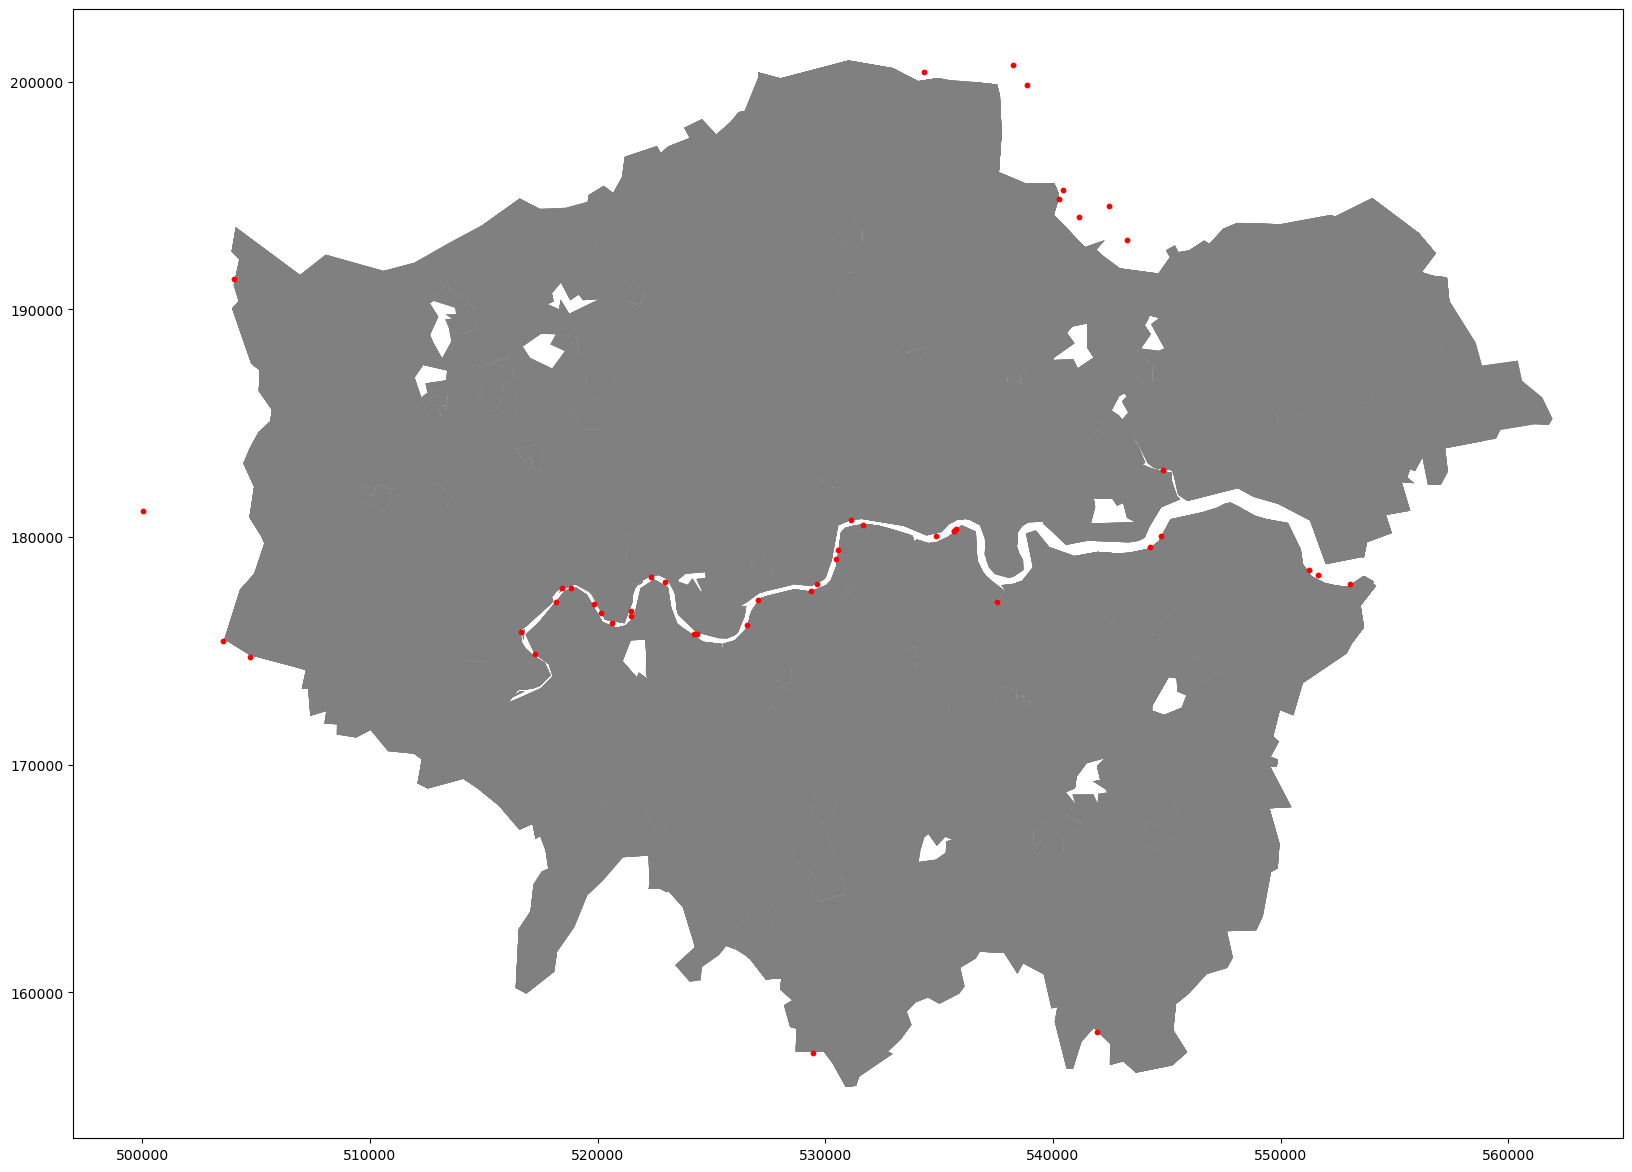

In [48]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20,20))
london_msoa_lfb.plot(ax=ax, color='grey')
lfb_msoa_symmetric_difference.plot(ax=ax, marker='o', color='red', markersize=10)

se crea una figura de 20X20 y con london_msoa_lfb.plot(ax=ax, color='grey'): Plotea las geometrías de las MSOA en Londres en el conjunto de ejes (ax). Las geometrías se colorearán en gris (color='grey').

In [49]:
lfb_msoa_stats = london_msoa_lfb.groupby('MSOA11CD').cost_gbp.agg(['count', 'sum']).reset_index().rename(columns={'count': 'incendios_totales', 'sum': 'costo_total'})

Con cost_gbp.agg(['count', 'sum']): Para cada grupo, calcula dos agregaciones. count: Cuenta el número de elementos, lo que da el total de incendios en esa MSOA.
sum: Suma los valores de la columna 'cost_gbp', proporcionando el costo total de incendios en esa MSOA

In [50]:
lfb_msoa_stats.head()

MSOA11CD  incendios_totales  costo_total
0  E02000001                 13       4083.0
1  E02000002                  6       1926.0
2  E02000003                 11       4779.0
3  E02000004                  7       2917.0
4  E02000005                  5       1411.0

In [51]:
lfb_msoa_stats['cost_per_incident'] = lfb_msoa_stats.costo_total/lfb_msoa_stats.incendios_totales

In [52]:
lfb_msoa_stats.head()

MSOA11CD  incendios_totales  costo_total  cost_per_incident
0  E02000001                 13       4083.0         314.076923
1  E02000002                  6       1926.0         321.000000
2  E02000003                 11       4779.0         434.454545
3  E02000004                  7       2917.0         416.714286
4  E02000005                  5       1411.0         282.200000

In [53]:
msoa_lfb = pd.merge(msoa_london, lfb_msoa_stats, on = 'MSOA11CD', how = 'left')

pd.merge se usa para combinar dos DataFrames, con on='MSOA11CD' se especifica la columna sobre la cual se realizará la unión, con how='left' se especifica el tipo de fusión a realizar. En este caso, están realizando una fusión izquierda, lo que significa que se conservarán todas las filas del DataFrame izquierdo

In [54]:
msoa_lfb.head()

MSOA11CD                                           geometry  \
0  E02000001  POLYGON ((532946.065 181894.827, 533410.692 18...   
1  E02000002  POLYGON ((549000.726 190873.464, 549120.966 18...   
2  E02000003  POLYGON ((548954.517 189063.241, 549085.611 18...   
3  E02000004  POLYGON ((551943.782 186027.614, 551670.827 18...   
4  E02000005  POLYGON ((549418.680 187442.412, 548983.438 18...   

   incendios_totales  costo_total  cost_per_incident  
0               13.0       4083.0         314.076923  
1                6.0       1926.0         321.000000  
2               11.0       4779.0         434.454545  
3                7.0       2917.0         416.714286  
4                5.0       1411.0         282.200000

<Axes: >

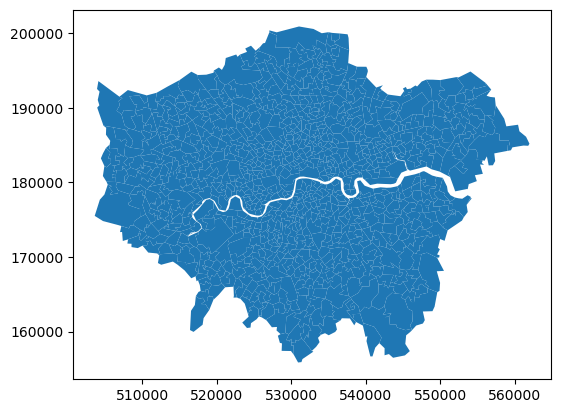

In [55]:
msoa_lfb.plot()

El objeto Figure es un contenedor que aloja todo lo que ves en la página. El objeto Axes es la parte de la página que contiene los datos. Es el lienzo en el que dibujaremos con nuestros datos para visualizarlos.

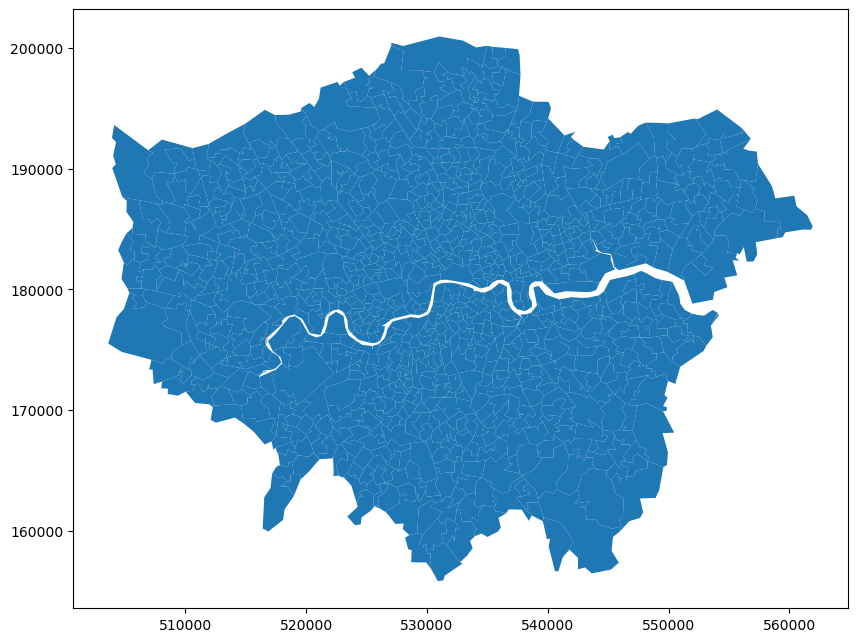

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(ax=ax)

Podemos especificar una variable que nos gustaría visualizar en el mapa. Solo necesitamos establecer el argumento "column".Los agujeros en el mapa indican que hay datos faltantes.

msoa_lfb.plot(column='cost_per_incident', ax=ax): Plotea las geometrías de las Áreas de Estadísticas de Pequeñas Áreas (MSOA) en Londres en el conjunto de ejes (ax). La coloración del mapa está determinada por los valores de la columna 'cost_per_incident'. Cada área se coloreará de manera diferente según el valor de 'cost_per_incident' en esa área.

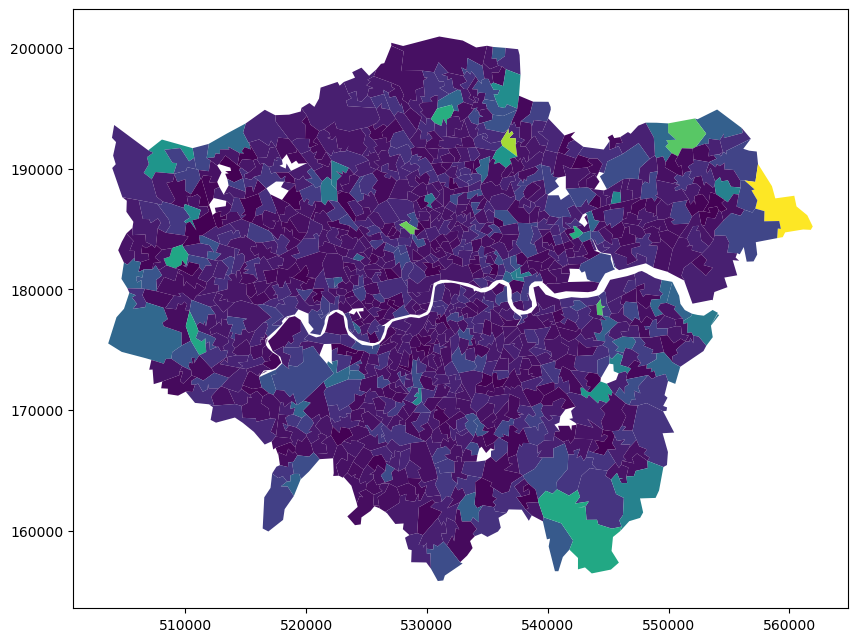

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(column='cost_per_incident', ax=ax)

In [60]:
from mapclassify import Quantiles

También podemos seleccionar un método de clasificación para agrupar nuestros datos en categorías. Utilizaremos los cuantiles y los pasaremos al argumento "scheme". El argumento "k" especifica la cantidad de categorías por las cuales queremos dividir nuestros datos.

<Axes: >

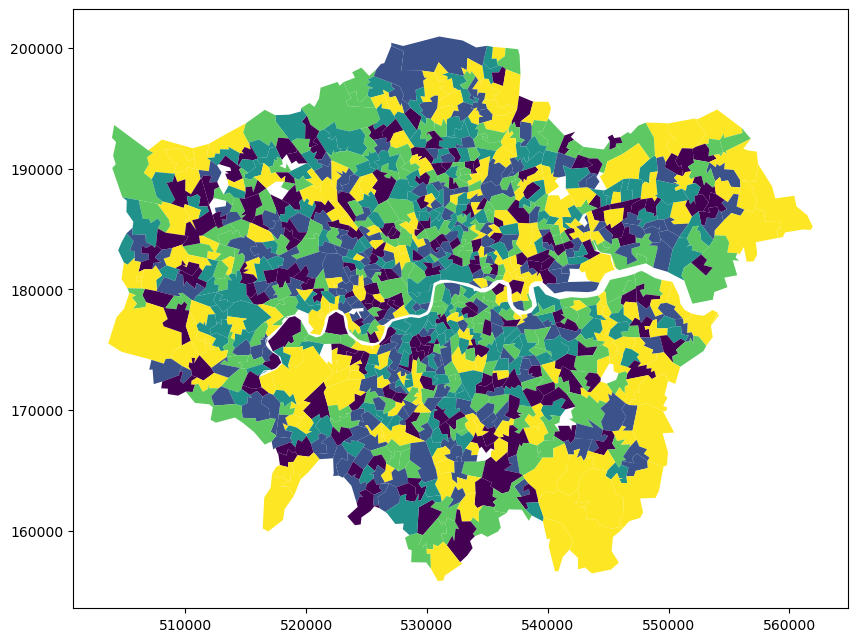

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, ax=ax)

camp es para los colores. Se aplica la clasificación en cuantiles con 5 categorías (k=5) y se utiliza un esquema de color 'Blues'. Además, se muestra una leyenda (legend=True) para indicar la relación entre los colores y los valores numéricos.

<Axes: >

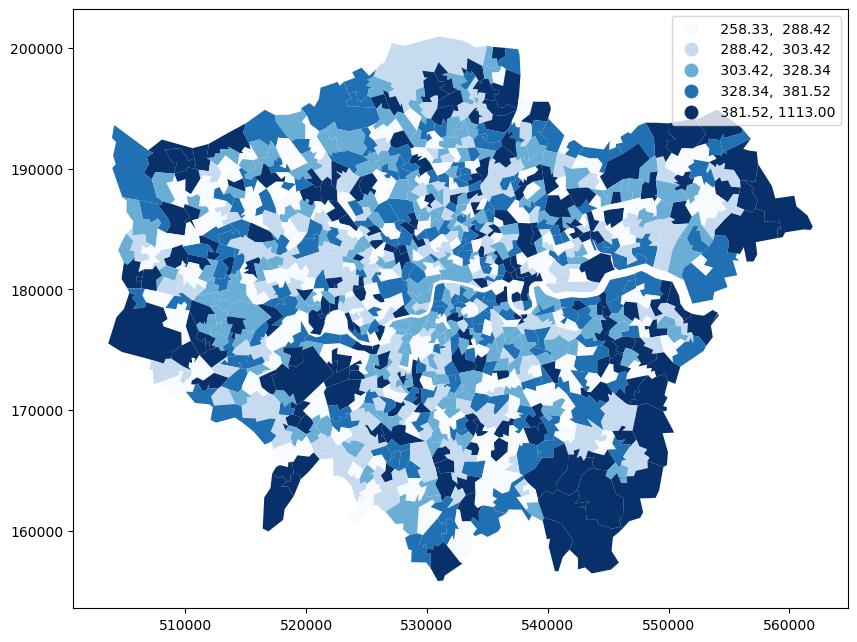

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, cmap = 'Blues', legend =True, ax=ax)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

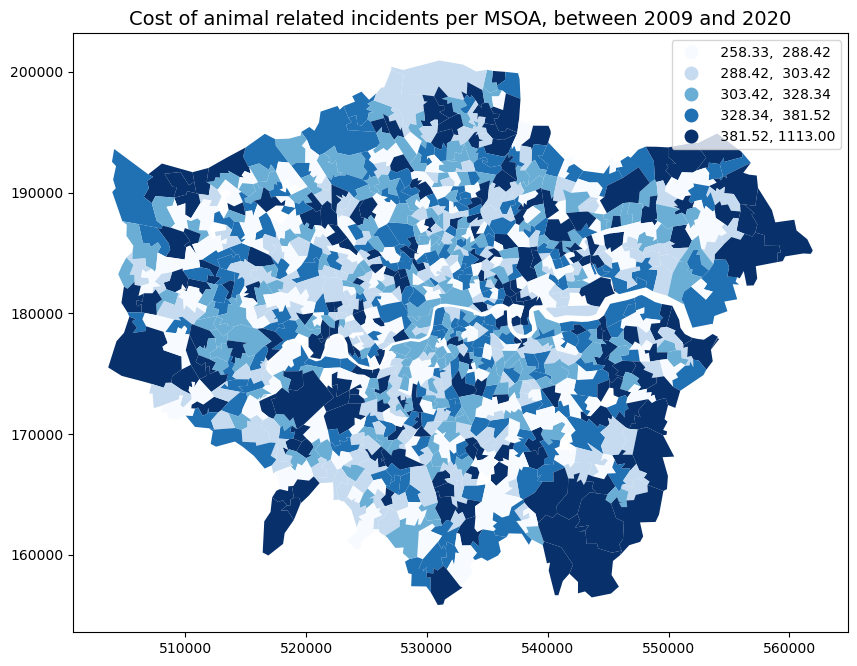

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'cost_per_incident', ax = ax, scheme='QUANTILES', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

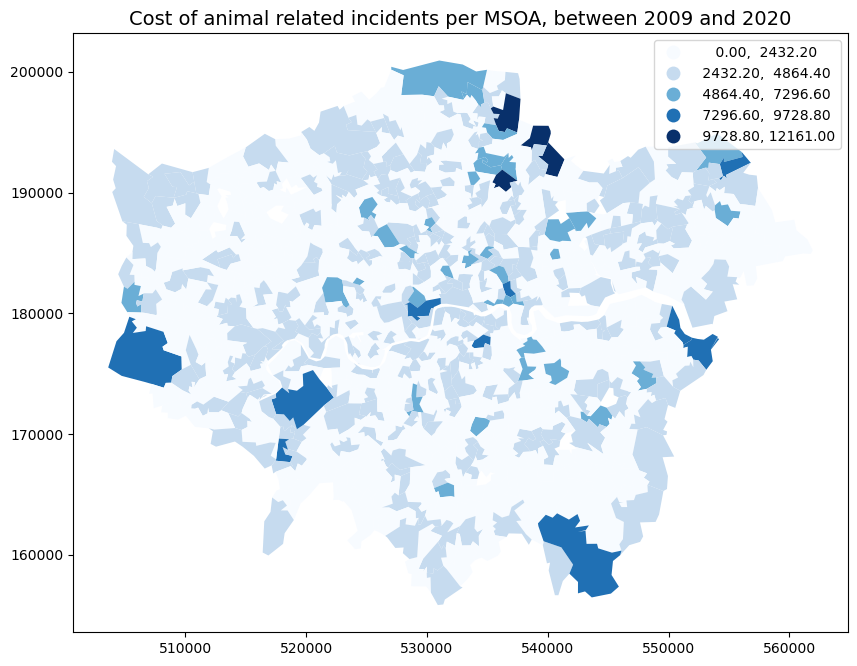

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'costo_total', ax = ax, scheme='equal_interval', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

La coloración del mapa está determinada por los valores de la columna 'costo_total'. Se aplica la clasificación de intervalos iguales (scheme='equal_interval')

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

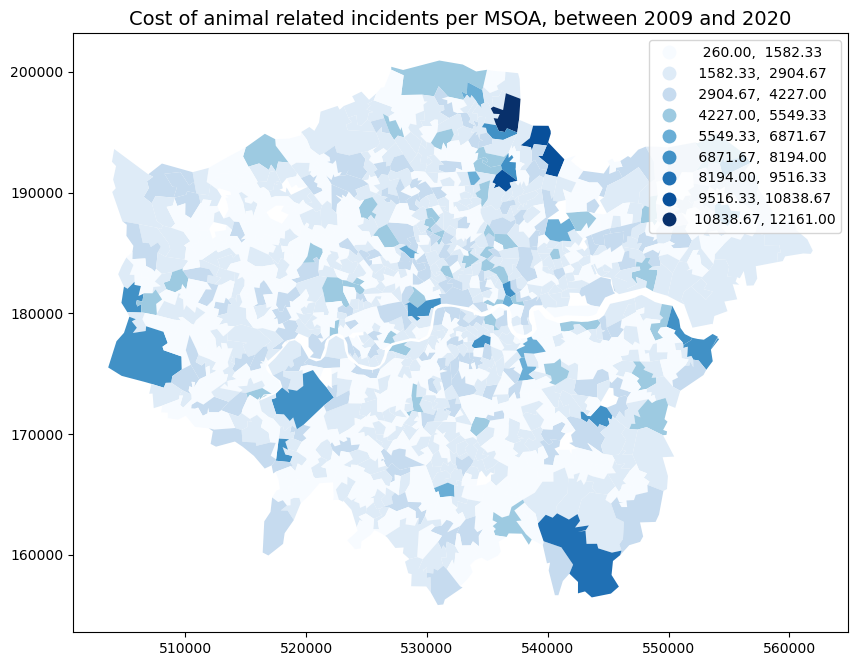

In [65]:
ax = msoa_lfb.dropna().plot(column='costo_total', cmap='Blues', figsize=(10,10), scheme='equal_interval', k=9, legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

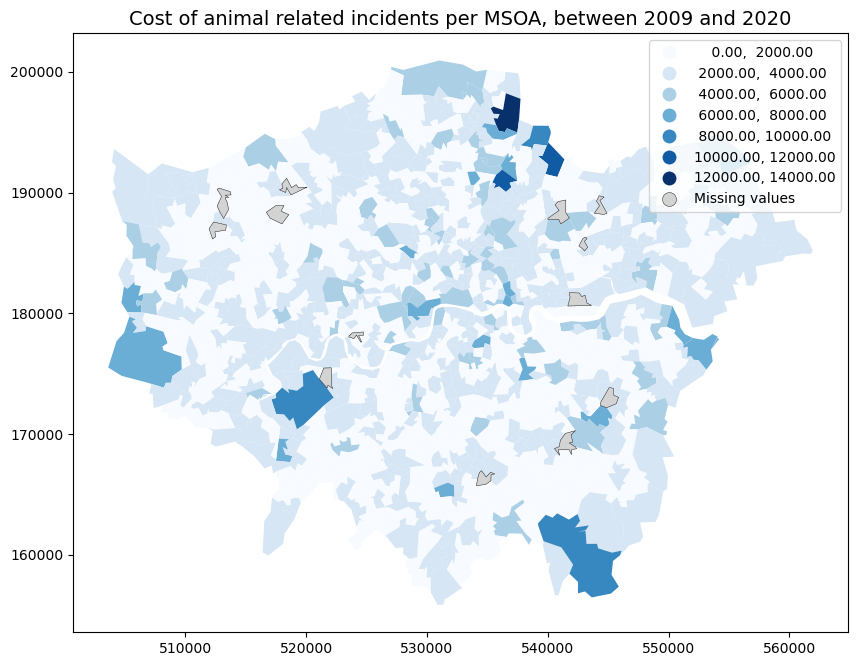

In [66]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', figsize=(10,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

scheme="User_Defined": Utiliza una clasificación definida por el usuario para asignar colores a los valores.
legend=True: Muestra una leyenda
classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]}: Define los límites de clasificación para la asignación de colores a través de la clasificación definida por el usuario.
missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3, "label": "Missing values"}: Define cómo se deben representar los valores faltantes en el mapa, utilizando un color gris claro ("lightgrey"), bordes de color negro ("edgecolor": "black"), un ancho de línea de 0.3 y una etiqueta en la leyenda indicando "Valores faltantes".

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

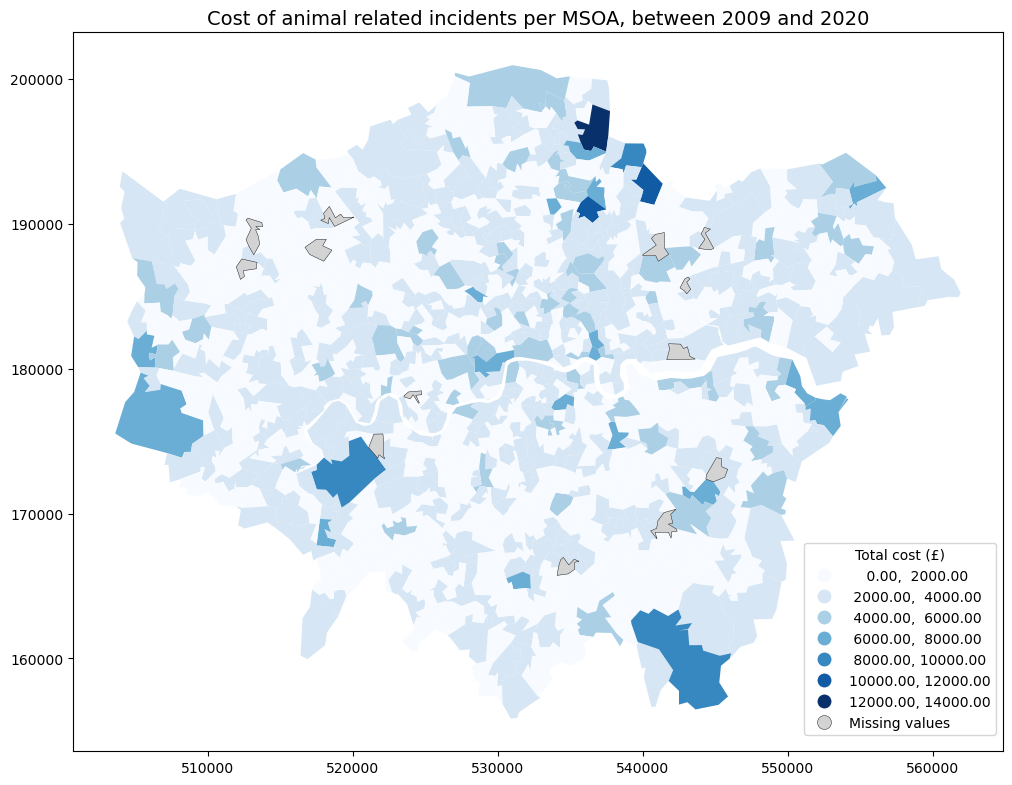

In [67]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.3), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

se le agregó un linewidth=0.2 que especifica el ancho de línea del borde de las áreas, y edgecolor='k': Especifica el color del borde de las áreas como negro ('k').

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

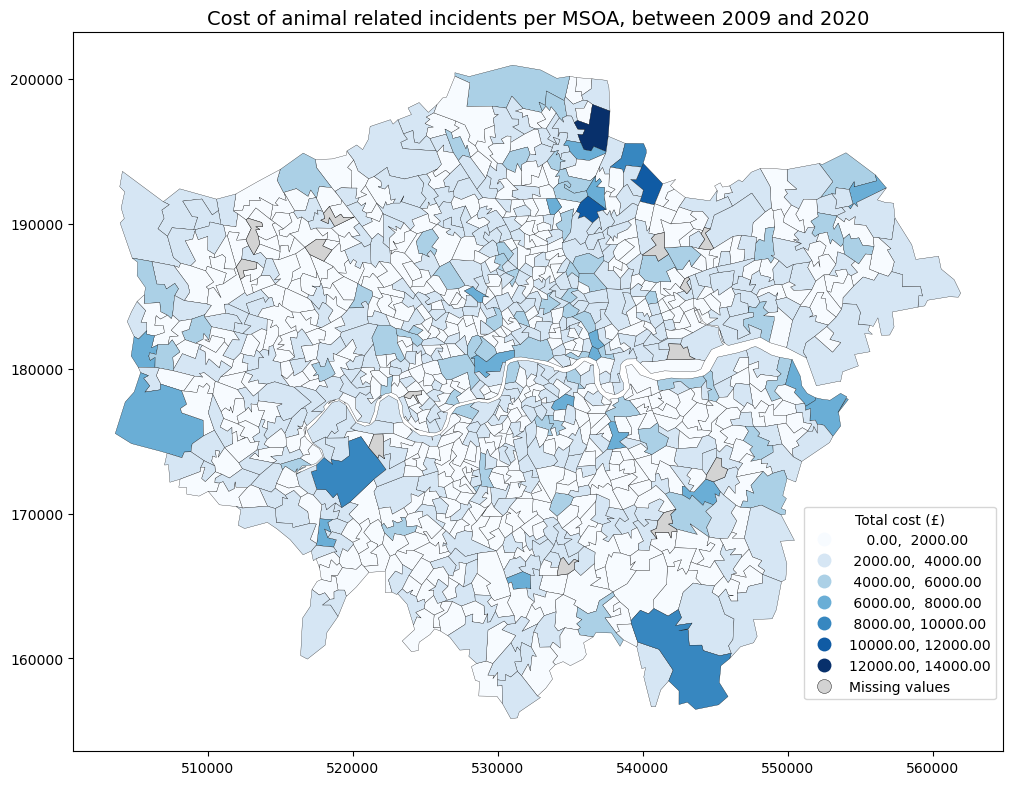

In [68]:
ax = msoa_lfb.plot(column='costo_total', cmap='Blues', edgecolor = 'k',
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.35), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Average cost of animal related incidents between 2009 and 2020')

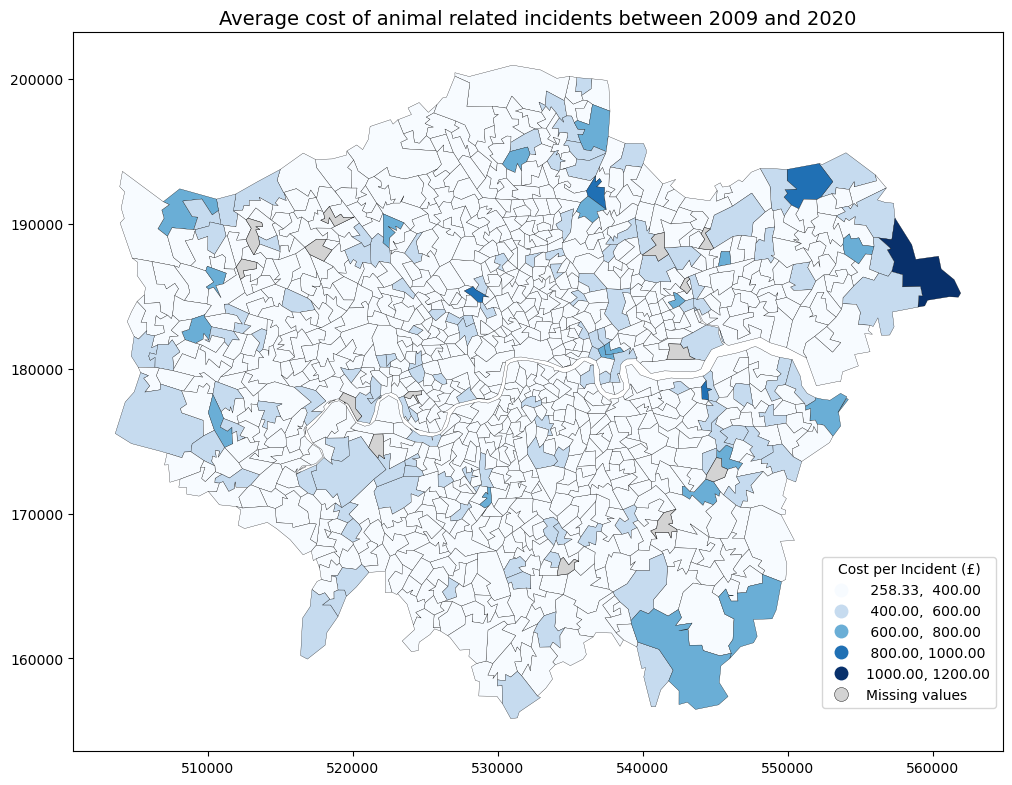

In [69]:
ax = msoa_lfb.plot(column='cost_per_incident', cmap='Blues', edgecolor = 'k',
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)